In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/Users/zhuyuanhao/Downloads/boston.csv')

In [3]:
df[df.isnull().values==True]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [4]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


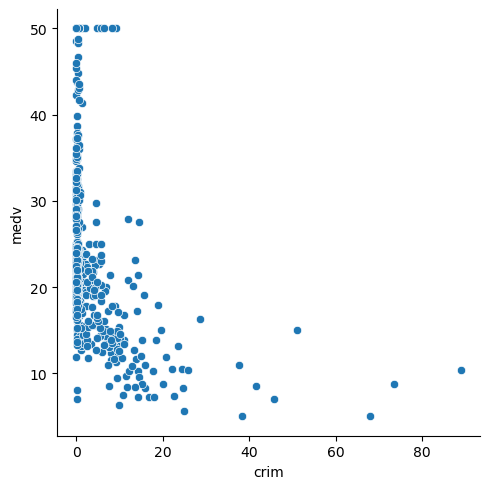

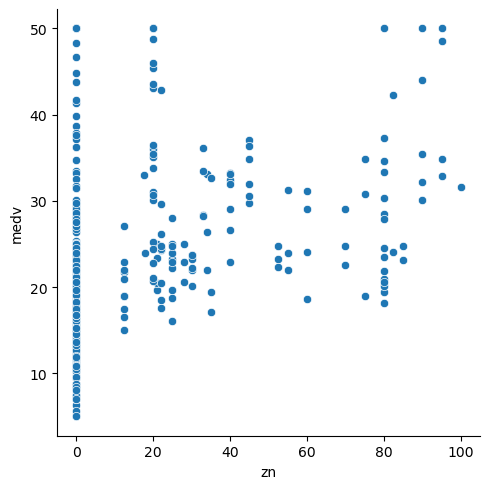

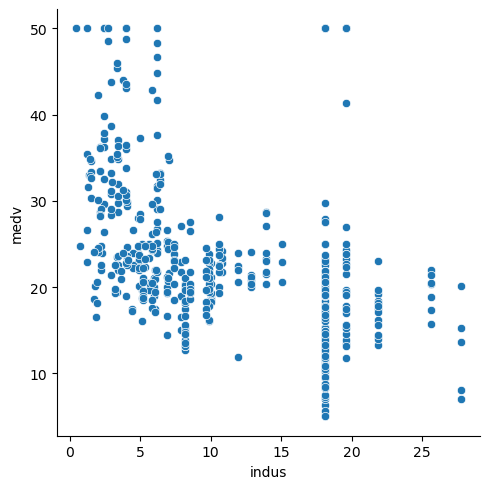

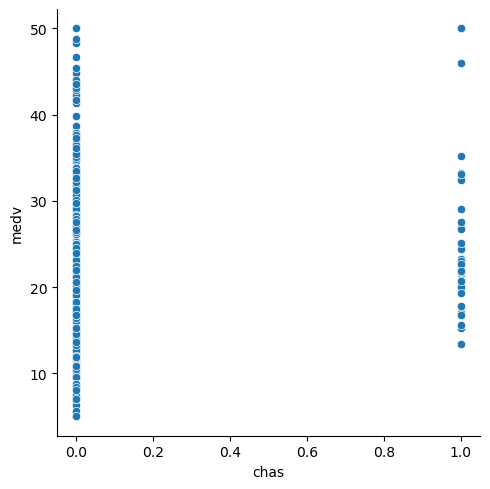

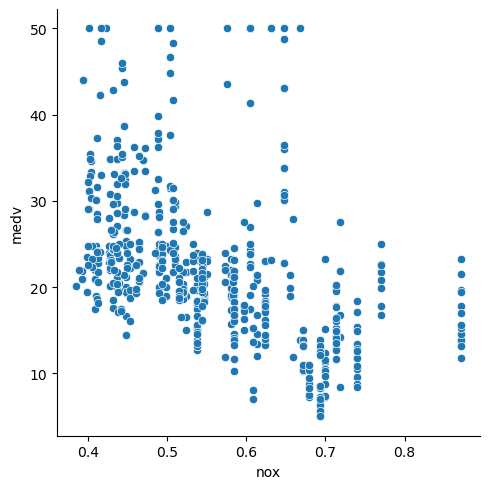

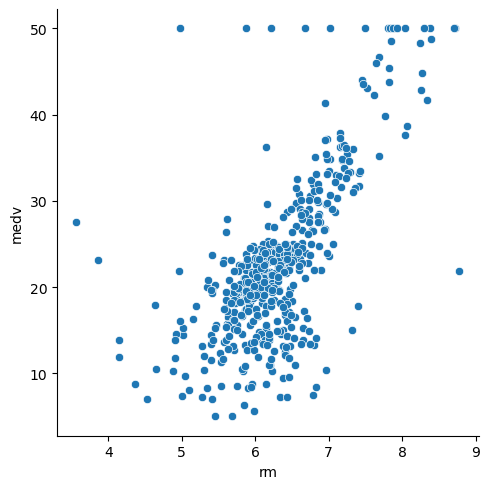

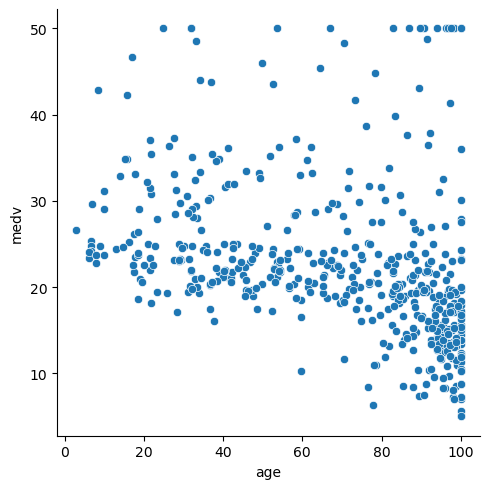

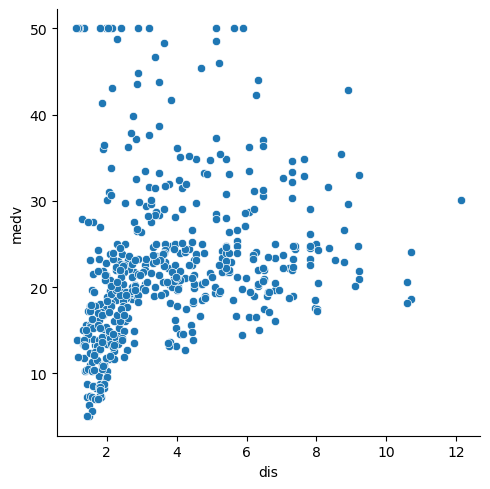

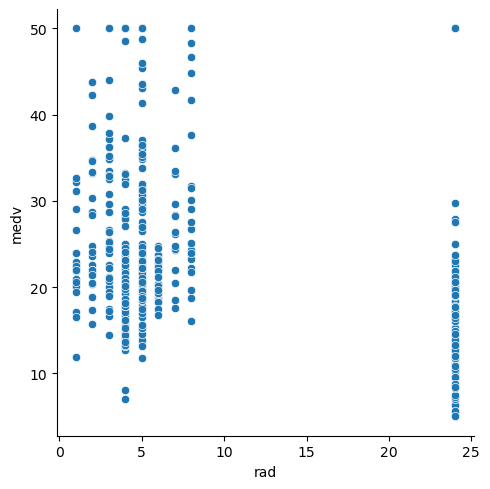

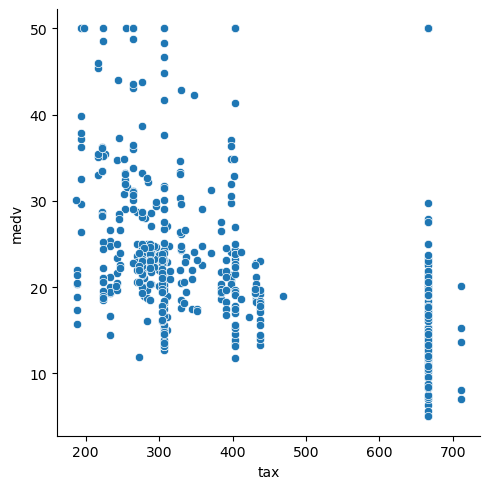

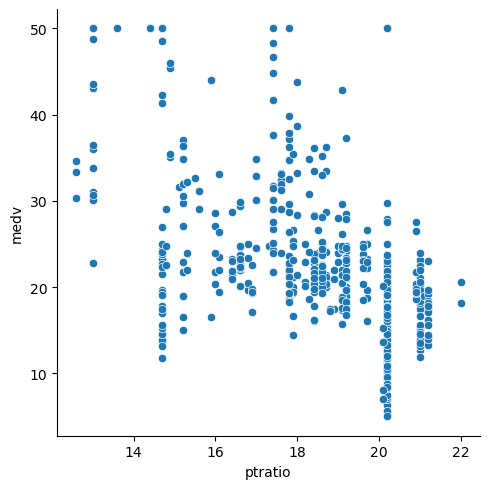

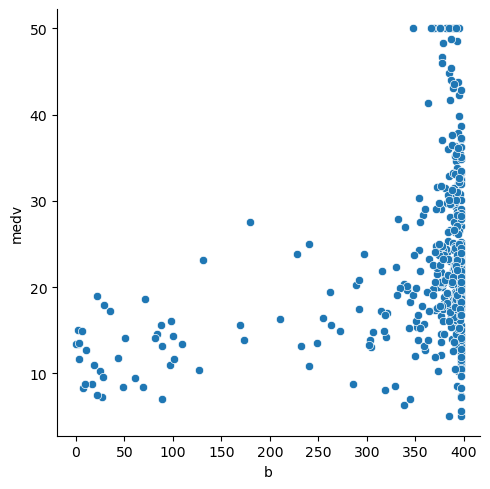

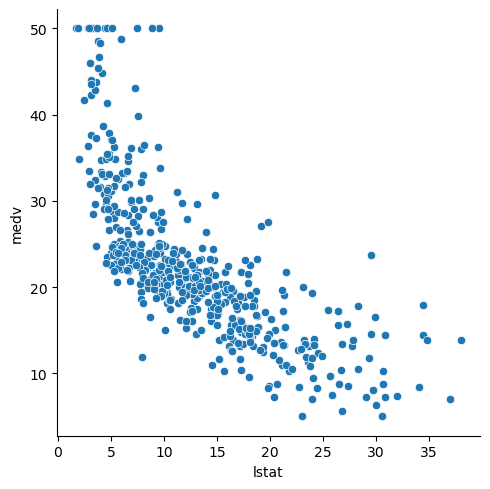

In [6]:
sns.relplot(x='crim',y='medv',data=df)
sns.relplot(x='zn',y='medv',data=df)
sns.relplot(x='indus',y='medv',data=df)
sns.relplot(x='chas',y='medv',data=df)
sns.relplot(x='nox',y='medv',data=df)
sns.relplot(x='rm',y='medv',data=df)
sns.relplot(x='age',y='medv',data=df)
sns.relplot(x='dis',y='medv',data=df)
sns.relplot(x='rad',y='medv',data=df)
sns.relplot(x='tax',y='medv',data=df)
sns.relplot(x='ptratio',y='medv',data=df)
sns.relplot(x='b',y='medv',data=df)
sns.relplot(x='lstat',y='medv',data=df)
plt.show()

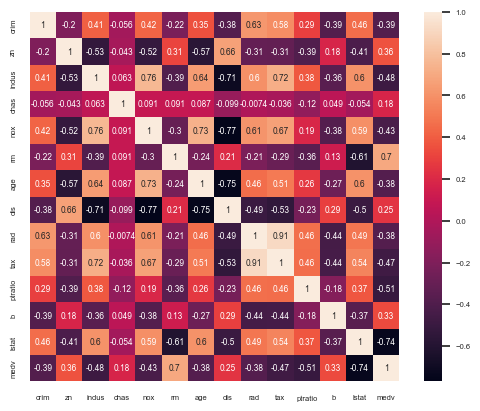

In [7]:
corrmatrix = df[df.columns].corr()
sns.set(font_scale=0.5)
heatmap=sns.heatmap(corrmatrix,annot=True,vmax=1,square=True)
plt.show()

In [8]:
sca = MinMaxScaler()
sca.fit(df)
sca.fit_transform(df[['indus','nox','rm','tax','ptratio','lstat','medv']])

array([[0.06781525, 0.31481481, 0.57750527, ..., 0.28723404, 0.08967991,
        0.42222222],
       [0.24230205, 0.17283951, 0.5479977 , ..., 0.55319149, 0.2044702 ,
        0.36888889],
       [0.24230205, 0.17283951, 0.6943859 , ..., 0.55319149, 0.06346578,
        0.66      ],
       ...,
       [0.42045455, 0.38683128, 0.65433991, ..., 0.89361702, 0.10789183,
        0.42      ],
       [0.42045455, 0.38683128, 0.61946733, ..., 0.89361702, 0.13107064,
        0.37777778],
       [0.42045455, 0.38683128, 0.47307913, ..., 0.89361702, 0.16970199,
        0.15333333]])

In [9]:
x=sca.fit_transform(df[['indus','nox','rm','tax','ptratio','lstat','medv']])
u=pd.DataFrame(x)
u.columns = ['indus','nox','rm','tax','ptratio','lstat','medv']

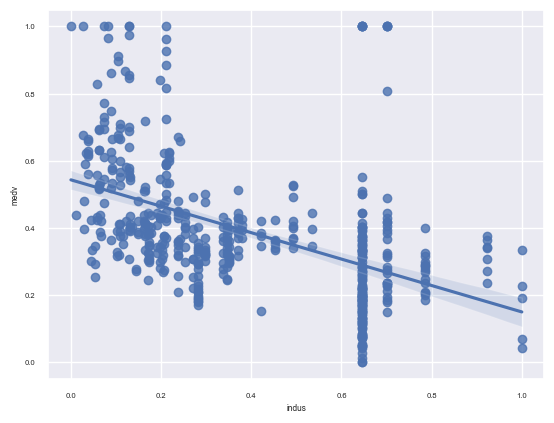

In [10]:
sns.regplot(x=u['indus'],y=u['medv'],data=u,ci=95)
plt.show()

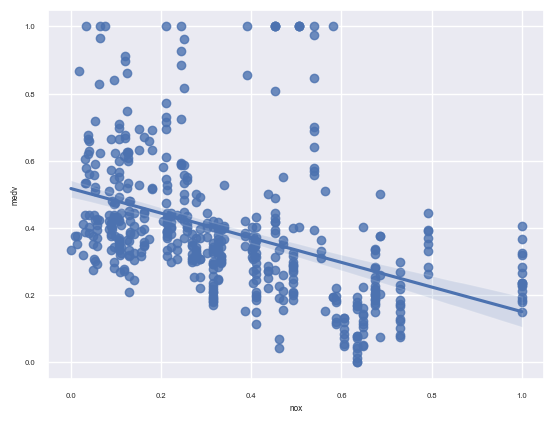

In [11]:
sns.regplot(x=u['nox'],y=u['medv'],data=u,ci=95)
plt.show()

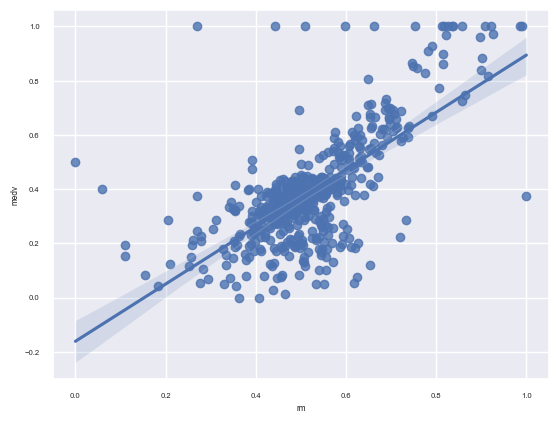

In [12]:
sns.regplot(x=u['rm'],y=u['medv'],data=u,ci=95)
plt.show()

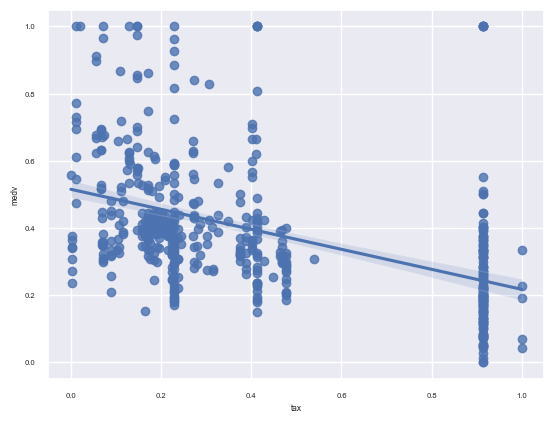

In [13]:
sns.regplot(x=u['tax'],y=u['medv'],data=u,ci=95)
plt.show()

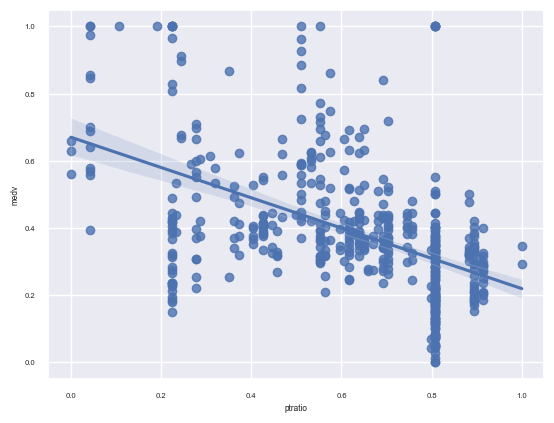

In [14]:
sns.regplot(x=u['ptratio'],y=u['medv'],data=u,ci=95)
plt.show()

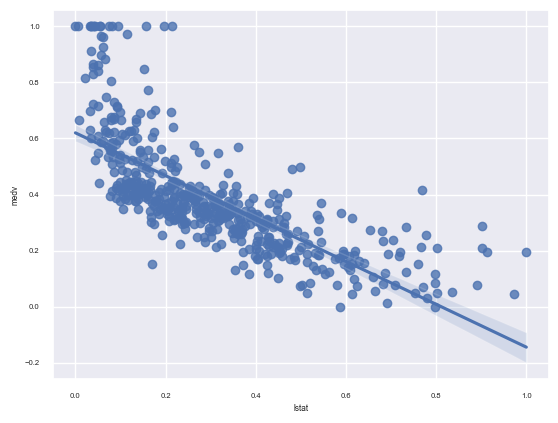

In [15]:
sns.regplot(x=u['lstat'],y=u['medv'],data=u,ci=95)
plt.show()

In [16]:
total_x = u[['indus','nox','rm','tax','ptratio','lstat']]
total_y = u['medv']
total_x.insert(loc=6,column='constant',value=1)

In [17]:
rand = random.sample(range(506),405)
train_x = total_x.iloc[rand]
train_y = total_y.iloc[rand]
test_x = total_x.drop(rand)
test_y = total_y.drop(rand)
w=[0.1]*7

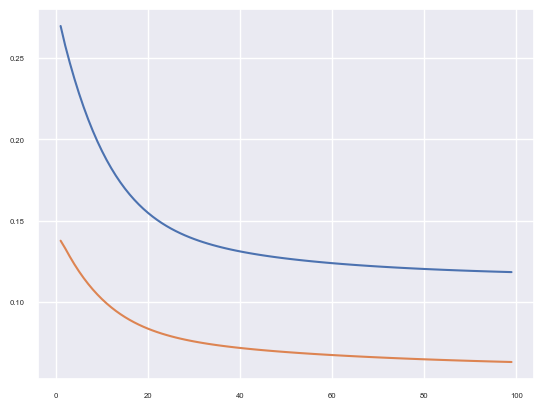

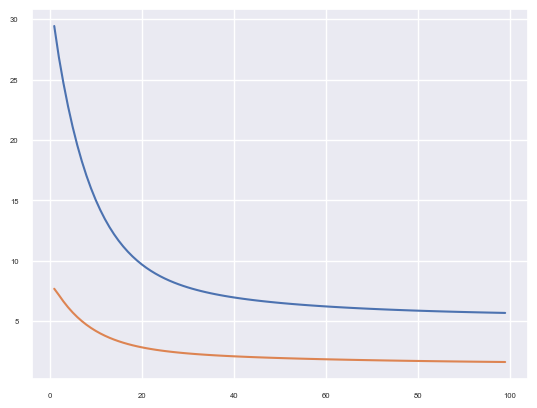

In [18]:
res_train_rmse=[]
res_test_rmse=[]
res_train_loss=[]
res_test_loss=[]
ax=[]
for i in range(1,100):
    res_train_rmse.append((np.transpose(train_x @ np.transpose(w) - train_y)@(train_x @ np.transpose(w) - train_y) /405)**0.5)
    res_test_rmse.append((np.transpose(test_x @ np.transpose(w) - test_y)@(test_x @ np.transpose(w) - test_y) /405)**0.5)
    res_train_loss.append((np.transpose(train_x @ np.transpose(w) - train_y)@(train_x @ np.transpose(w) - train_y)))
    res_test_loss.append((np.transpose(test_x @ np.transpose(w) - test_y)@(test_x @ np.transpose(w) - test_y)))
    ax.append(i)
    w = w- 0.001*np.transpose(train_x) @ (train_x @ np.transpose(w) - train_y)
plt.plot(ax,res_train_rmse)
plt.plot(ax,res_test_rmse)
plt.show()
plt.plot(ax,res_train_loss)
plt.plot(ax,res_test_loss)
plt.show()

In [19]:
(np.transpose(test_x @ np.transpose(w) - test_y)@(test_x @ np.transpose(w) - test_y) /405)**0.5

0.06317266293025348

In [20]:
(np.transpose(test_x @ np.transpose(w) - test_y)@(test_x @ np.transpose(w) - test_y))

1.6162680633882656

In [21]:
def train(iteration_size,step_size):
    w=[0.1]*7
    for i in range(1,iter):
        w = w- step_size*np.transpose(train_x) @ (train_x @ np.transpose(w) - train_y)
    return (np.transpose(test_x @ np.transpose(w) - test_y)@(test_x @ np.transpose(w) - test_y) /405)**0.5

In [22]:
iter=10
step=0.0000001
for i in range(10):
    print(i,train(100,step))
    step*=10

0 0.13773078936801894
1 0.13769050135306657
2 0.13728856487778818
3 0.1333231539380151
4 0.10182282690143452
5 1628104.4642545835
6 4105965834784454.5
7 4.4813392871759575e+24
8 4.5205038477908594e+33
9 4.5244369872811174e+42


In [23]:
for i in range(5):
    print(i,train(iter,0.001))
    iter*=10

0 0.10182282690143452
1 0.06317266293025348
2 0.05857701110446105
3 0.058581796887928625
4 0.058581796887930186
